In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22278


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22273,2021-04-29,47,沖縄県,76,12404,0,134
22274,2021-04-30,47,沖縄県,59,12463,2,136
22275,2021-05-01,47,沖縄県,105,12568,1,137
22276,2021-05-02,47,沖縄県,57,12625,0,137
22277,2021-05-03,47,沖縄県,57,12682,0,137


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数
42,静岡県,10428,6564,121
43,香川県,17538,1324,23
44,高知県,18486,1077,20
45,鳥取県,14694,375,2
46,鹿児島県,21804,2270,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pop.head()

,都道府県名,人口
0,北海道,5267762
1,青森県,1275783
2,岩手県,1235517
3,宮城県,2292385
4,秋田県,985416


In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数,人口
0,三重県,11376,3899,87,1813859
1,京都府,12324,12957,187,2545899
2,佐賀県,19434,1677,13,823810
3,兵庫県,13272,32923,704,5549568
4,北海道,474,24790,871,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数,人口,１万人当たりの感染者数
4,北海道,474,24790,871,5267762,47.059833
41,青森県,948,1632,23,1275783,12.792144
19,岩手県,1422,988,32,1235517,7.996652
11,宮城県,1896,8143,69,2292385,35.521956
36,秋田県,2370,506,9,985416,5.134887
15,山形県,2844,1538,33,1082296,14.210530
35,福島県,3318,3513,124,1881981,18.666501
38,茨城県,3792,8317,135,2921436,28.468876
27,栃木県,4266,5420,71,1965516,27.575456
37,群馬県,4740,6236,104,1969439,31.663839


## 感染者数

### 平均値、中央値

In [7]:
print(all_jp["各地の感染者数合計"].describe())

count        47.000000
mean      12903.000000
std       25225.765973
min         357.000000
25%        1654.500000
50%        3855.000000
75%        8230.000000
max      141713.000000
Name: 各地の感染者数合計, dtype: float64


## １万人あたりの感染者数

### 平均値、中央値

In [8]:
print(all_jp["１万人当たりの感染者数"].describe())

count     47.000000
mean      29.493107
std       22.606016
min        5.134887
25%       14.654453
50%       21.495607
75%       40.550803
max      102.431347
Name: １万人当たりの感染者数, dtype: float64


## グラフ化

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [10]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


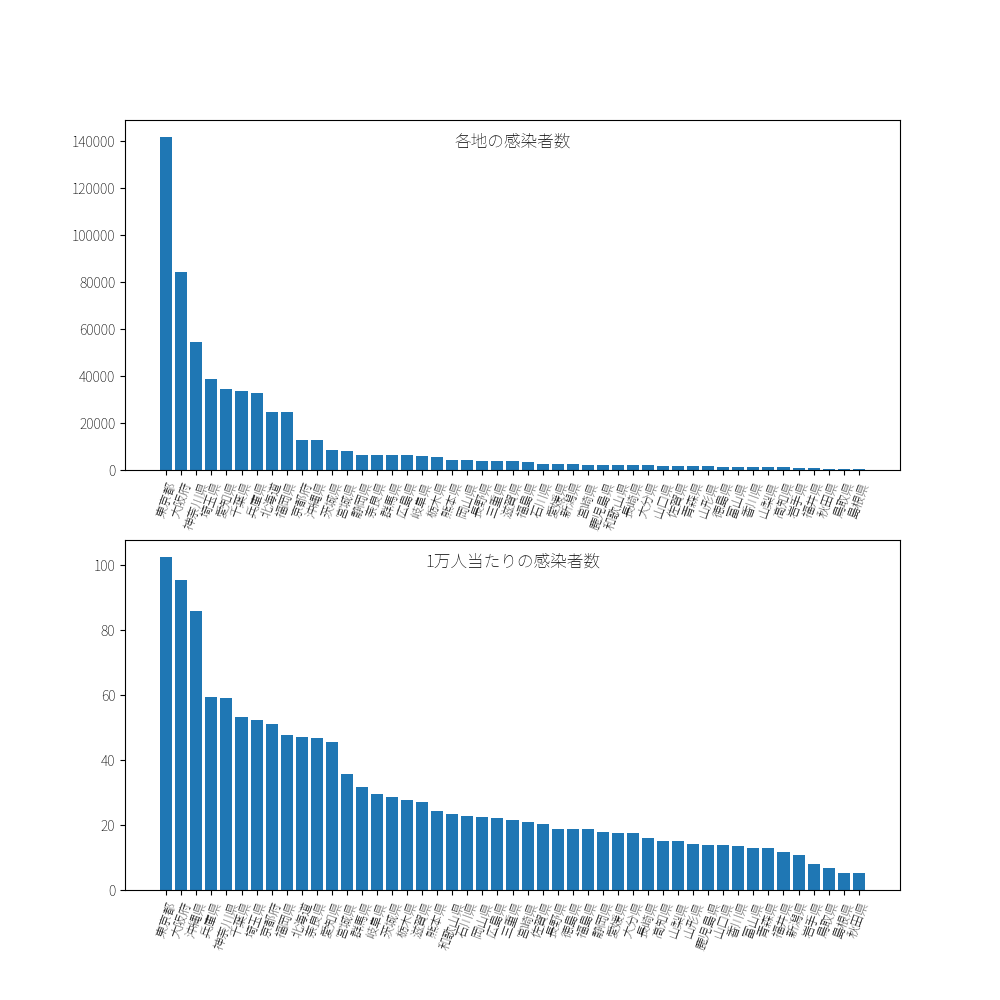

Text(0.5, 0.9, '1万人当たりの感染者数')

In [11]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


## 度数分布表

In [12]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=10)

print(hist)
print(bin_edges)

[38  2  4  1  0  1  0  0  0  1]
[   357.   14492.6  28628.2  42763.8  56899.4  71035.   85170.6  99306.2
 113441.8 127577.4 141713. ]


## ヒストグラム

<IPython.core.display.Javascript object>


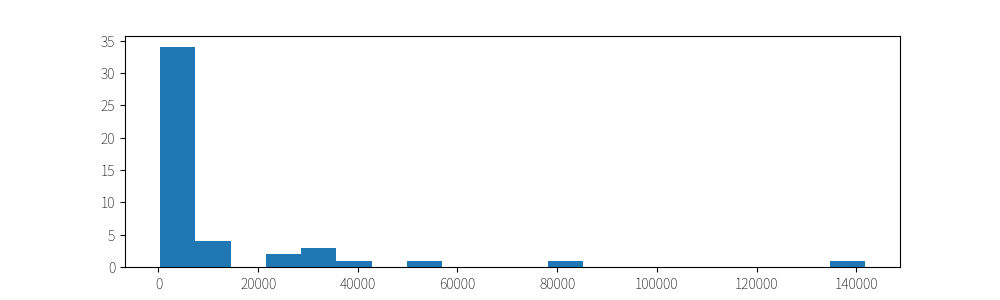

(array([34.,  4.,  0.,  2.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   357. ,   7424.8,  14492.6,  21560.4,  28628.2,  35696. ,
         42763.8,  49831.6,  56899.4,  63967.2,  71035. ,  78102.8,
         85170.6,  92238.4,  99306.2, 106374. , 113441.8, 120509.6,
        127577.4, 134645.2, 141713. ]),
 <a list of 20 Patch objects>)

In [13]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=20)